In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [ ]:
!pip install pyreadstat

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

1. DATA ACQUISITION

In [56]:
data_fr = pd.read_csv('/content/framingham.csv')

1.1 Scanning the data frame

In [57]:
data_fr.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000,0,0.000,0.000,0,0,0,195.000,106.000,70.000,26.970,80.000,77.000,0
1,0,46,2.000,0,0.000,0.000,0,0,0,250.000,121.000,81.000,28.730,95.000,76.000,0
2,1,48,1.000,1,20.000,0.000,0,0,0,245.000,127.500,80.000,25.340,75.000,70.000,0
3,0,61,3.000,1,30.000,0.000,0,1,0,225.000,150.000,95.000,28.580,65.000,103.000,1
4,0,46,3.000,1,23.000,0.000,0,0,0,285.000,130.000,84.000,23.100,85.000,85.000,0


In [ ]:
data_fr.shape        # dimensions

(4240, 16)

In [ ]:
data_fr.info() #columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [58]:
## basic descriptive
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_fr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.000,0.429,0.495,0.000,0.000,0.000,1.000,1.000
age,4240.000,49.580,8.573,32.000,42.000,49.000,56.000,70.000
education,4135.000,1.979,1.020,1.000,1.000,2.000,3.000,4.000
currentSmoker,4240.000,0.494,0.500,0.000,0.000,0.000,1.000,1.000
cigsPerDay,4211.000,9.006,11.922,0.000,0.000,0.000,20.000,70.000
BPMeds,4187.000,0.030,0.170,0.000,0.000,0.000,0.000,1.000
prevalentStroke,4240.000,0.006,0.077,0.000,0.000,0.000,0.000,1.000
prevalentHyp,4240.000,0.311,0.463,0.000,0.000,0.000,1.000,1.000
diabetes,4240.000,0.026,0.158,0.000,0.000,0.000,0.000,1.000
totChol,4190.000,236.700,44.591,107.000,206.000,234.000,263.000,696.000


2. filtering data set


In [65]:
data_fr = data_fr.drop(['glucose'], axis=1)

In [ ]:
data_fr.shape

(4240, 15)

In [66]:
data_fr.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [69]:
data_fr.isnull().sum()/len(data_fr)*100

male              0.000
age               0.000
education         2.476
currentSmoker     0.000
cigsPerDay        0.684
BPMeds            1.250
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           1.179
sysBP             0.000
diaBP             0.000
BMI               0.448
heartRate         0.024
TenYearCHD        0.000
dtype: float64

1.3 how to detect missing values


In [62]:
import missingno as msno

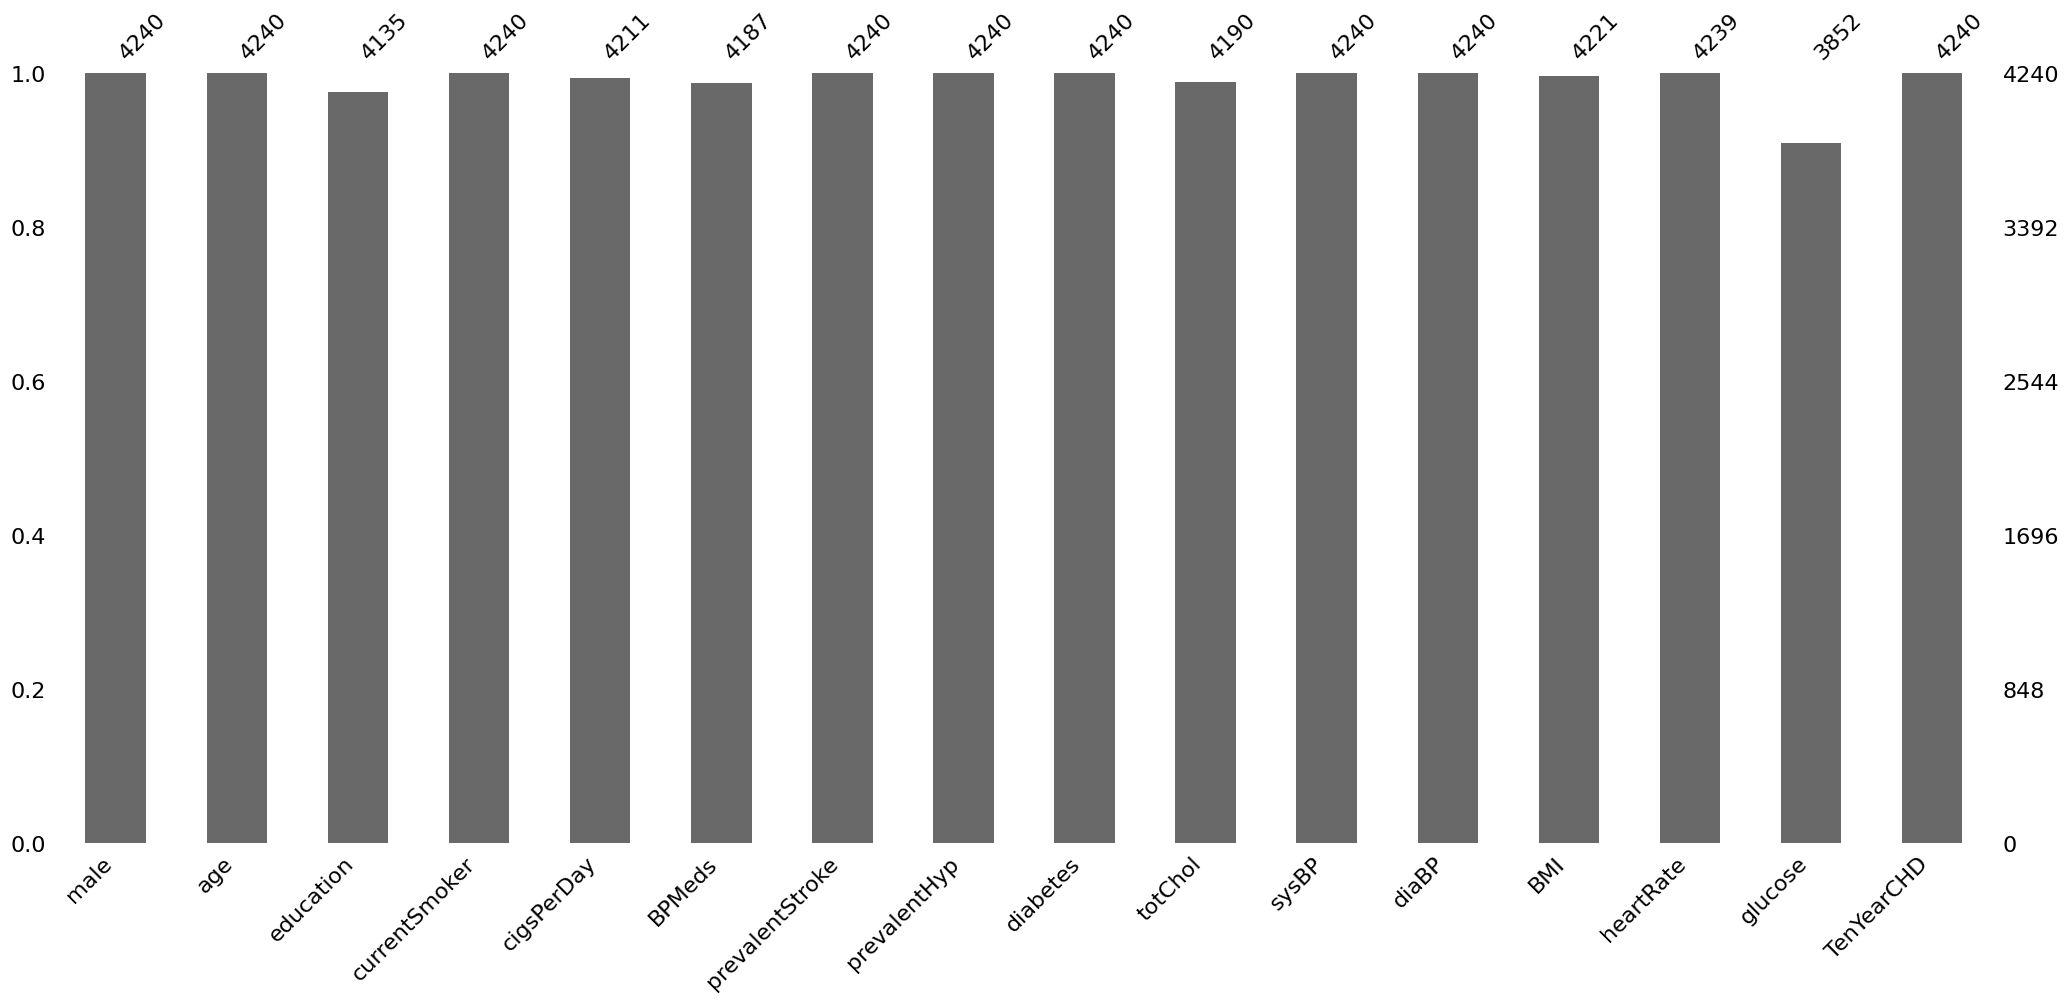

In [63]:
# visiualizing relative missingness of the columns
msno.bar(data_fr)
plt.show()

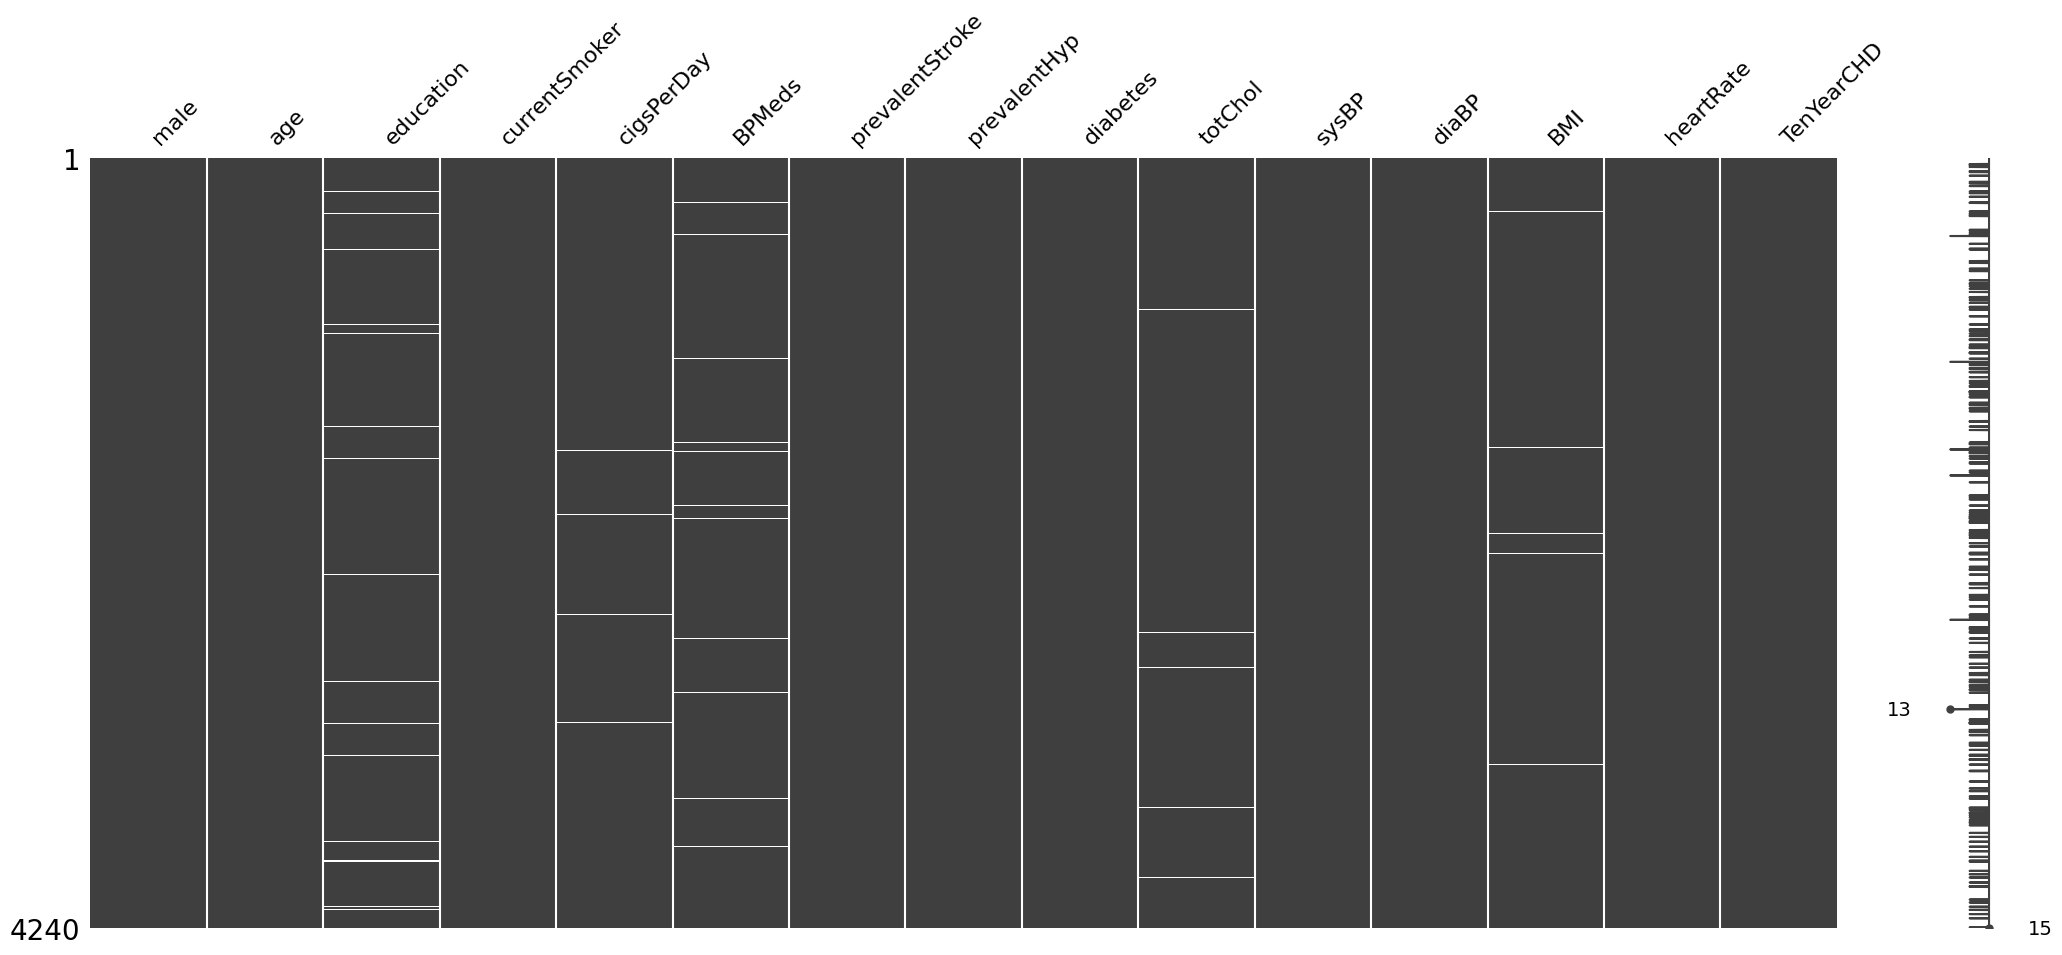

In [70]:
# visiualizing relative missingness of the columns
msno.matrix(data_fr)
plt.show()

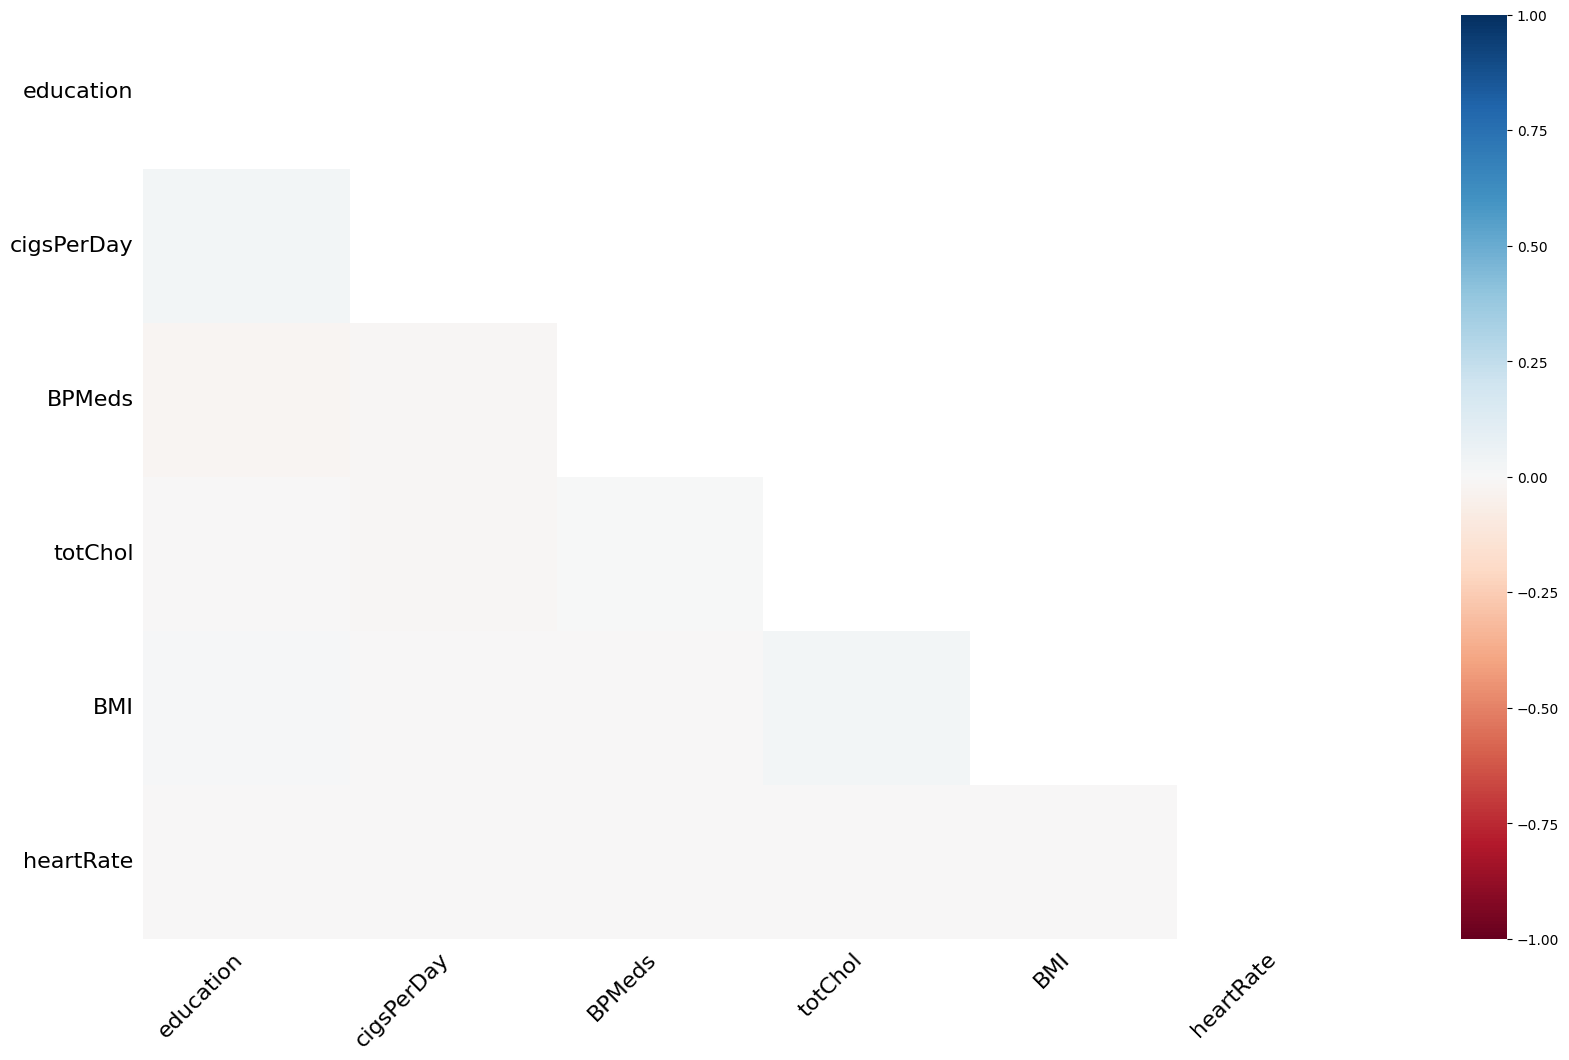

In [71]:
import missingno as msno
msno.heatmap(data_fr)
plt.show()

In [9]:
# data_fr['totChol'] = data_fr['totChol'].fillna(data_fr['totChol'].mean())
# data_fr['BPMeds'] = data_fr['BPMeds'].fillna(data_fr['BPMeds'].mean())
# data_fr['cigsPerDay'] = data_fr['cigsPerDay'].fillna(data_fr['cigsPerDay'].mean())
# data_fr['BMI'] = data_fr['BMI'].fillna(data_fr['BMI'].mean())

In [72]:
data_fr.isnull().sum()*100/len(data_fr)

male              0.000
age               0.000
education         2.476
currentSmoker     0.000
cigsPerDay        0.684
BPMeds            1.250
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           1.179
sysBP             0.000
diaBP             0.000
BMI               0.448
heartRate         0.024
TenYearCHD        0.000
dtype: float64

In [73]:
# drop rows with >10% missingness
data_fr = data_fr.dropna()

In [74]:
data_fr.isnull().sum()*100/len(data_fr)

male              0.000
age               0.000
education         0.000
currentSmoker     0.000
cigsPerDay        0.000
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.000
heartRate         0.000
TenYearCHD        0.000
dtype: float64

In [75]:
data_fr.shape

(3989, 15)

1.5 checking for duplicate

In [76]:
data_fr.duplicated().sum()

0

In [ ]:
# remove duplicates
# data_fr.drop_duplicates(['subset'])

KeyError: ignored

3. TRANSFORMING


In [ ]:
data_fr.rename(columns={'male':'gender'},inplace=True)

In [13]:
data_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4239 non-null   int64  
 1   age              4239 non-null   int64  
 2   currentSmoker    4239 non-null   int64  
 3   cigsPerDay       4239 non-null   float64
 4   BPMeds           4239 non-null   float64
 5   prevalentStroke  4239 non-null   int64  
 6   prevalentHyp     4239 non-null   int64  
 7   diabetes         4239 non-null   int64  
 8   totChol          4239 non-null   float64
 9   sysBP            4239 non-null   float64
 10  diaBP            4239 non-null   float64
 11  BMI              4239 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          4239 non-null   float64
 14  TenYearCHD       4239 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 529.9 KB


In [ ]:
data_fr['diabetes'].unique()

array([0, 1])

In [ ]:
data_fr['diabetes'].value_counts(normalize=True)

0   0.974
1   0.026
Name: diabetes, dtype: float64

In [ ]:
pd.get_dummies(data_fr['diabetes'])

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
4235,1,0
4236,1,0
4237,1,0
4238,1,0


In [ ]:
data_fr['age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69])

In [ ]:
# importing labelEncoder from skLearm library from preprocessing modeule
from sklearn.preprocessing import LabelEncoder

In [ ]:
# creating a instance for label encoder
le = LabelEncoder()

In [ ]:
data_fr['cigsPerDay'].value_counts()

0.000     2145
20.000     734
30.000     218
15.000     210
10.000     143
9.000      130
5.000      121
3.000      100
40.000      80
1.000       67
43.000      56
25.000      55
9.006       29
35.000      22
2.000       18
6.000       18
7.000       12
8.000       11
60.000      11
4.000        9
17.000       7
18.000       7
50.000       6
23.000       6
11.000       5
45.000       3
13.000       3
12.000       3
16.000       3
14.000       2
19.000       2
38.000       1
29.000       1
70.000       1
Name: cigsPerDay, dtype: int64

1.7 converting the datetime text to pandas datetime


In [ ]:
# data_fr['date_column'] = pd.to_datetime(data_fr['date_column'])

In [14]:
data_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4239 non-null   int64  
 1   age              4239 non-null   int64  
 2   currentSmoker    4239 non-null   int64  
 3   cigsPerDay       4239 non-null   float64
 4   BPMeds           4239 non-null   float64
 5   prevalentStroke  4239 non-null   int64  
 6   prevalentHyp     4239 non-null   int64  
 7   diabetes         4239 non-null   int64  
 8   totChol          4239 non-null   float64
 9   sysBP            4239 non-null   float64
 10  diaBP            4239 non-null   float64
 11  BMI              4239 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          4239 non-null   float64
 14  TenYearCHD       4239 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 529.9 KB


**4. Data Exploration**

Target Variable


In [15]:
data_fr['prevalentStroke'].value_counts(normalize=True)

0   0.994
1   0.006
Name: prevalentStroke, dtype: float64

<Axes: >

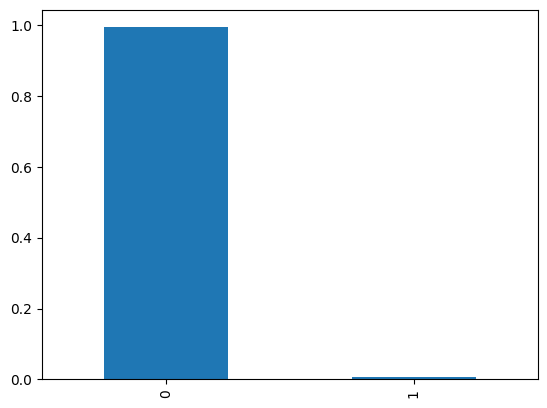

In [16]:
data_fr['prevalentStroke'].value_counts(normalize=True).plot(kind='bar')

In [17]:
data_fr.groupby('gender').mean()

KeyError: ignored

In [19]:
data_fr['SEX'] = data_fr['male'].replace([1.0, 0.0], ['male', 'female'])
data_fr.groupby('SEX')['diabetes'].mean()

SEX
female   0.024
male     0.029
Name: diabetes, dtype: float64

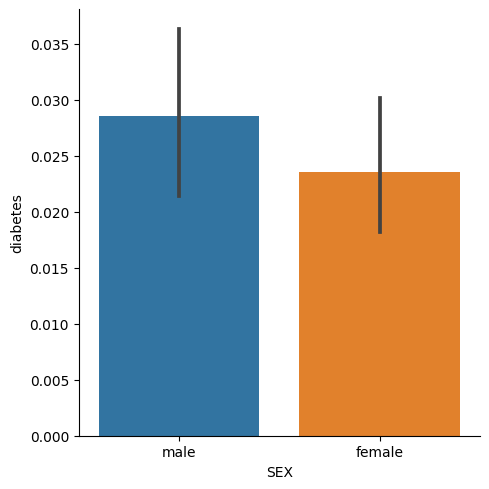

In [20]:
sns.catplot(data = data_fr, y='diabetes', x = 'SEX', kind='bar')
plt.show()

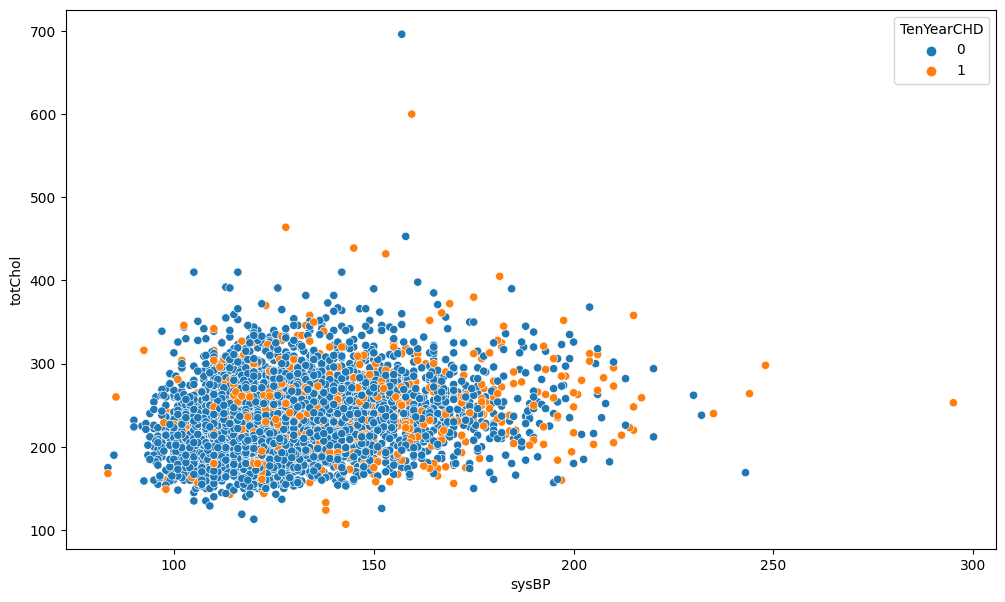

In [22]:
plt.figure(figsize=(12,7))
sns.scatterplot(data = data_fr, y='totChol', x = 'sysBP', hue = 'TenYearCHD')
plt.show()

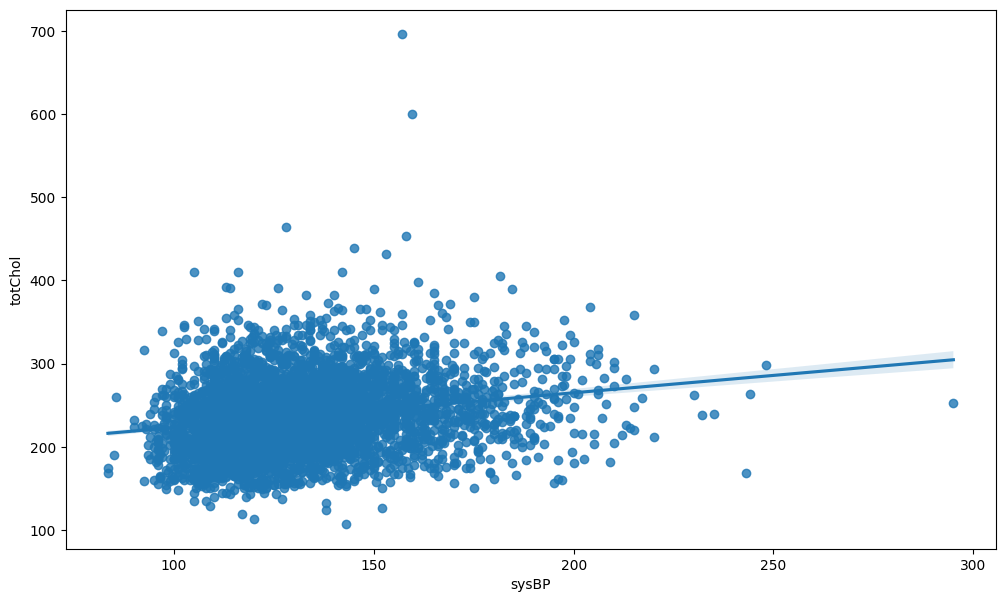

In [23]:
plt.figure(figsize=(12,7))
sns.regplot(data = data_fr, y='totChol', x = 'sysBP')
plt.show()

In [24]:
data_fr = data_fr.drop(['SEX'], axis=1)

Separating categorica varible

In [25]:
fr_cat = data_fr.select_dtypes(include=['category'])
fr_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239 entries, 0 to 4239
Empty DataFrame


In [26]:
fr_cat.nunique().sort_values()

Series([], dtype: float64)

In [27]:
data_fr.nunique().sort_values()

male                  2
currentSmoker         2
prevalentStroke       2
prevalentHyp          2
diabetes              2
TenYearCHD            2
BPMeds                3
cigsPerDay           34
age                  39
heartRate            73
glucose             144
diaBP               146
sysBP               234
totChol             249
BMI                1365
dtype: int64

In [28]:
# creating a subset of categorical varibles that are labeled as float64
col_int = data_fr.nunique().reset_index()
col_int

,index,0
0,male,2
1,age,39
2,currentSmoker,2
3,cigsPerDay,34
4,BPMeds,3
5,prevalentStroke,2
6,prevalentHyp,2
7,diabetes,2
8,totChol,249
9,sysBP,234


In [ ]:
# changing all datatypes to integer
col_int.columns=['features','categories']
col_int['categories'] = col_int['categories'].astype('int64')

In [ ]:
## sort columns based on the number of unique values
col_int = col_int.sort_values(by='categories')
col_int = col_int[col_int.categories<10]
col_int.features.values

array(['gender', 'currentSmoker', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'TenYearCHD', 'BPMeds'], dtype=object)

In [ ]:
fr_cat = data_fr[col_int.features.values]
fr_cat

,gender,currentSmoker,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,BPMeds
0,1,0,0,0,0,0,0.000
1,0,0,0,0,0,0,0.000
2,1,1,0,0,0,0,0.000
3,0,1,0,1,0,1,0.000
4,0,1,0,0,0,0,0.000
...,...,...,...,...,...,...,...
4235,0,1,0,0,0,0,0.030
4236,0,1,0,0,0,0,0.000
4237,0,0,0,0,0,0,0.000
4238,1,0,0,1,0,0,0.000


<Axes: xlabel='BPMeds', ylabel='count'>

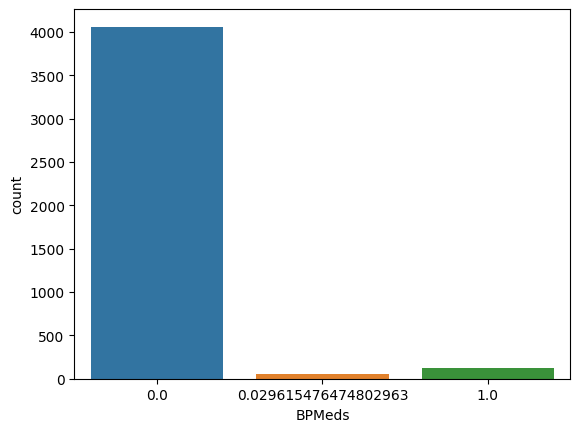

In [ ]:
sns.countplot(data=fr_cat, x= 'BPMeds')

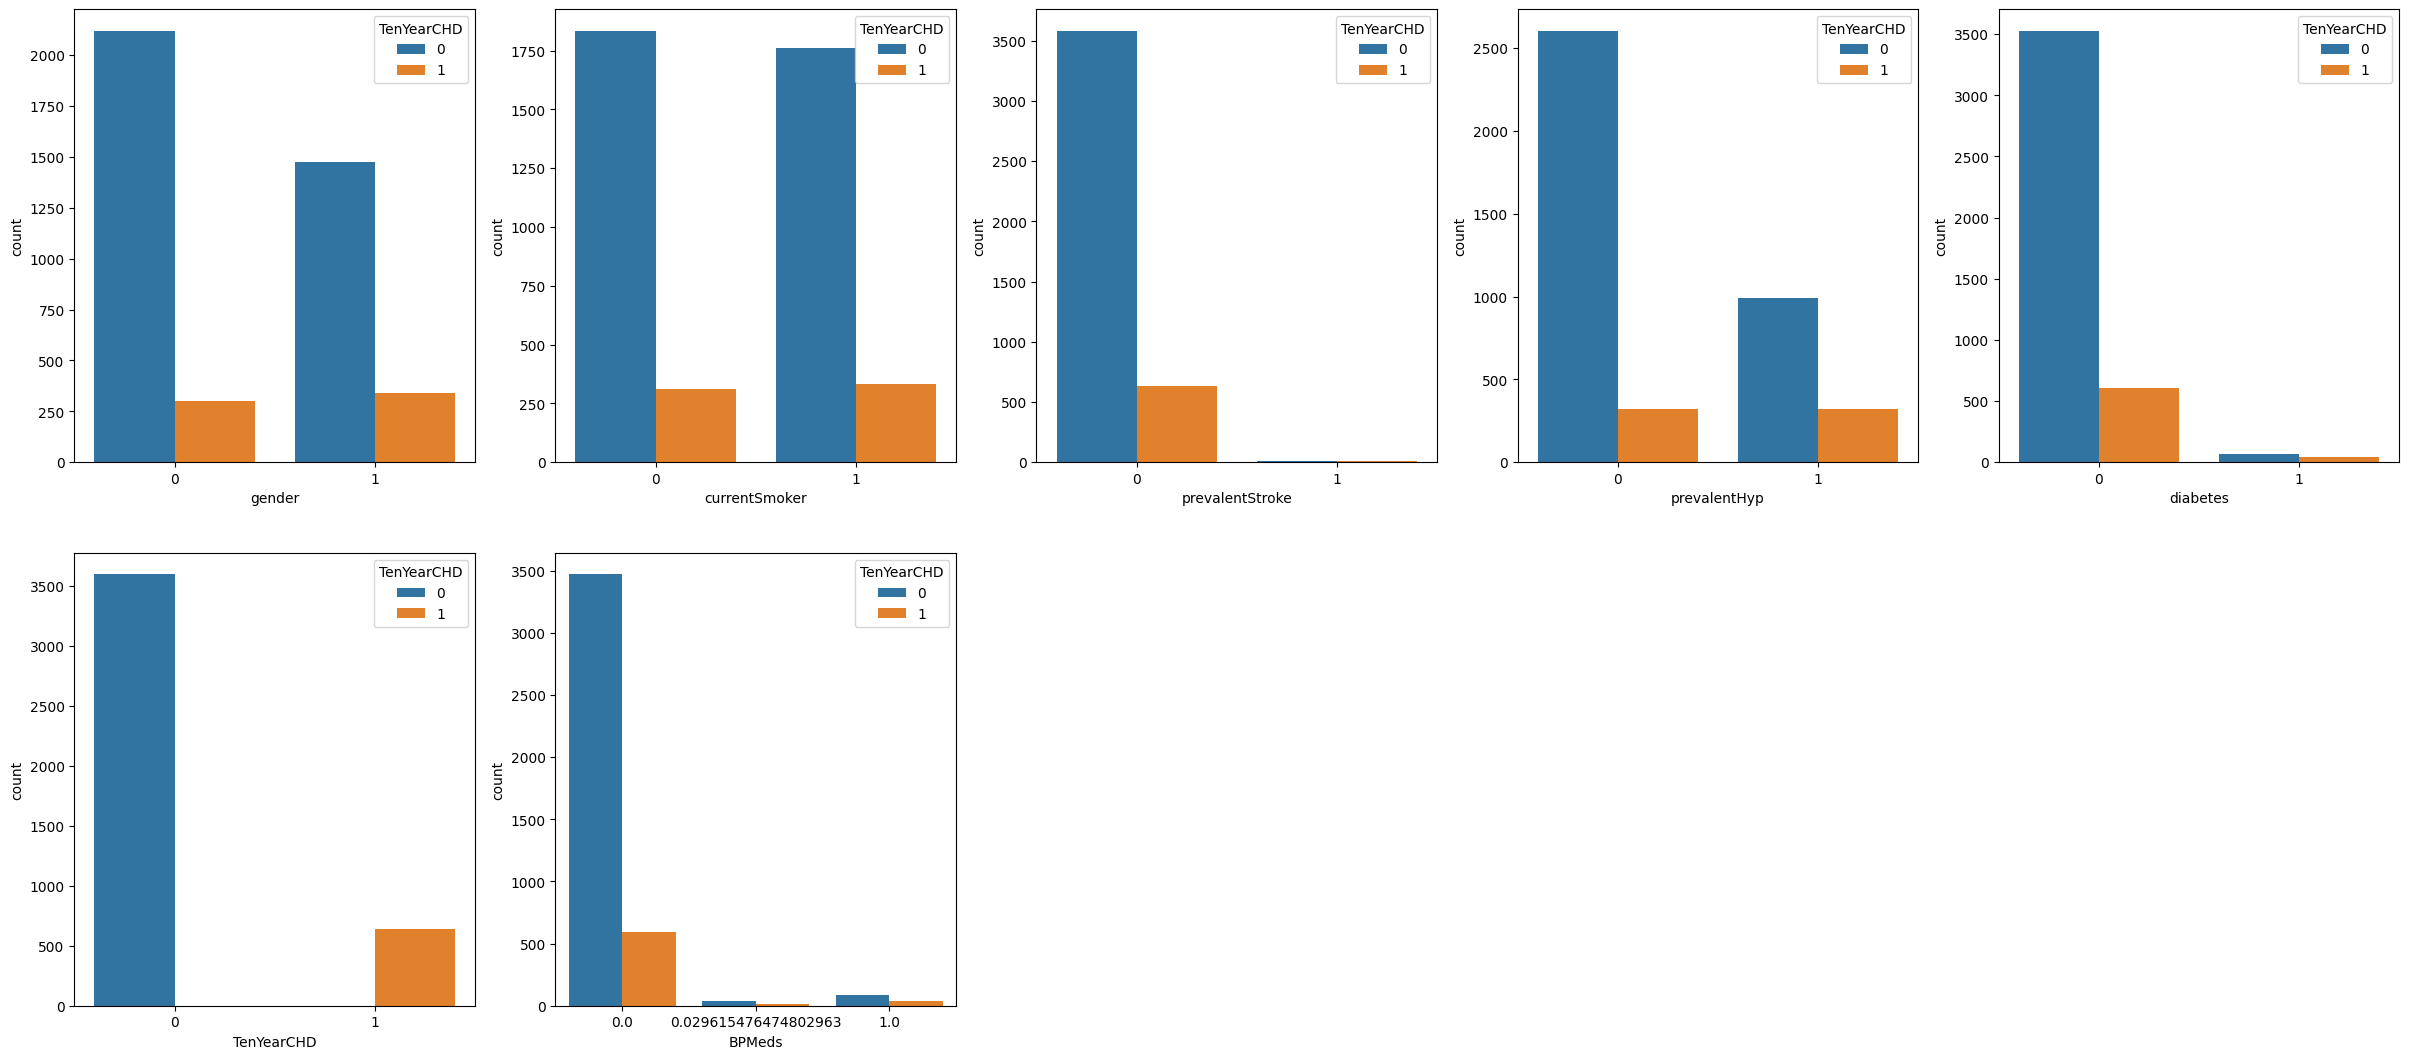

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(fr_cat.columns):
  plt.subplot(3, 5, i[0]+1)
  sns.countplot(x=i[1], hue='TenYearCHD', data = fr_cat)

continuous variables

In [32]:
## filterout a subset of categorical variable
fr_cont = data_fr.select_dtypes(include=['float'])
fr_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239 entries, 0 to 4239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cigsPerDay  4239 non-null   float64
 1   BPMeds      4239 non-null   float64
 2   totChol     4239 non-null   float64
 3   sysBP       4239 non-null   float64
 4   diaBP       4239 non-null   float64
 5   BMI         4239 non-null   float64
 6   heartRate   4239 non-null   float64
 7   glucose     4239 non-null   float64
dtypes: float64(8)
memory usage: 298.1 KB


In [30]:
# display subset of integer type categorical variable
fr_cont = data_fr.drop(fr_cat, axis=1)
fr_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4239 non-null   int64  
 1   age              4239 non-null   int64  
 2   currentSmoker    4239 non-null   int64  
 3   cigsPerDay       4239 non-null   float64
 4   BPMeds           4239 non-null   float64
 5   prevalentStroke  4239 non-null   int64  
 6   prevalentHyp     4239 non-null   int64  
 7   diabetes         4239 non-null   int64  
 8   totChol          4239 non-null   float64
 9   sysBP            4239 non-null   float64
 10  diaBP            4239 non-null   float64
 11  BMI              4239 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          4239 non-null   float64
 14  TenYearCHD       4239 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 529.9 KB


In [31]:
fr_cont.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000,-0.029,0.197,0.316,-0.052,-0.005,0.005,0.016,-0.070,-0.036,0.058,0.081,-0.117,0.006,0.088
age,-0.029,1.000,-0.214,-0.193,0.122,0.058,0.306,0.101,0.261,0.394,0.206,0.135,-0.013,0.117,0.225
currentSmoker,0.197,-0.214,1.000,0.767,-0.049,-0.033,-0.104,-0.044,-0.046,-0.131,-0.108,-0.168,0.063,-0.054,0.019
cigsPerDay,0.316,-0.193,0.767,1.000,-0.046,-0.033,-0.067,-0.037,-0.026,-0.089,-0.056,-0.093,0.075,-0.056,0.057
BPMeds,-0.052,0.122,-0.049,-0.046,1.000,0.115,0.259,0.052,0.079,0.252,0.192,0.100,0.015,0.049,0.087
prevalentStroke,-0.005,0.058,-0.033,-0.033,0.115,1.000,0.075,0.007,0.000,0.057,0.045,0.025,-0.018,0.018,0.062
prevalentHyp,0.005,0.306,-0.104,-0.067,0.259,0.075,1.000,0.078,0.163,0.696,0.616,0.300,0.147,0.083,0.177
diabetes,0.016,0.101,-0.044,-0.037,0.052,0.007,0.078,1.000,0.040,0.111,0.050,0.086,0.049,0.606,0.097
totChol,-0.070,0.261,-0.046,-0.026,0.079,0.000,0.163,0.040,1.000,0.208,0.163,0.115,0.091,0.045,0.082
sysBP,-0.036,0.394,-0.131,-0.089,0.252,0.057,0.696,0.111,0.208,1.000,0.785,0.325,0.182,0.134,0.216


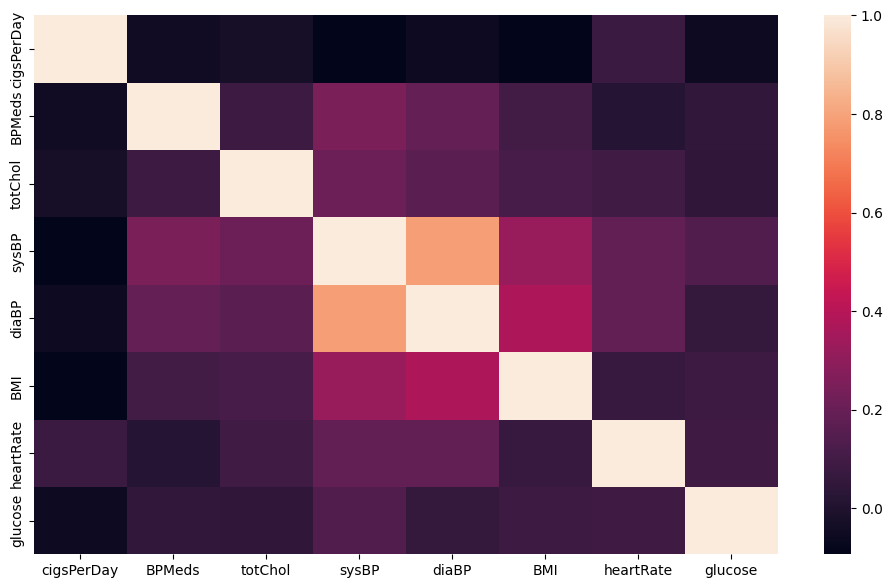

In [33]:
plt.figure(figsize=(12,7))
sns.heatmap(fr_cont.corr())
plt.show()

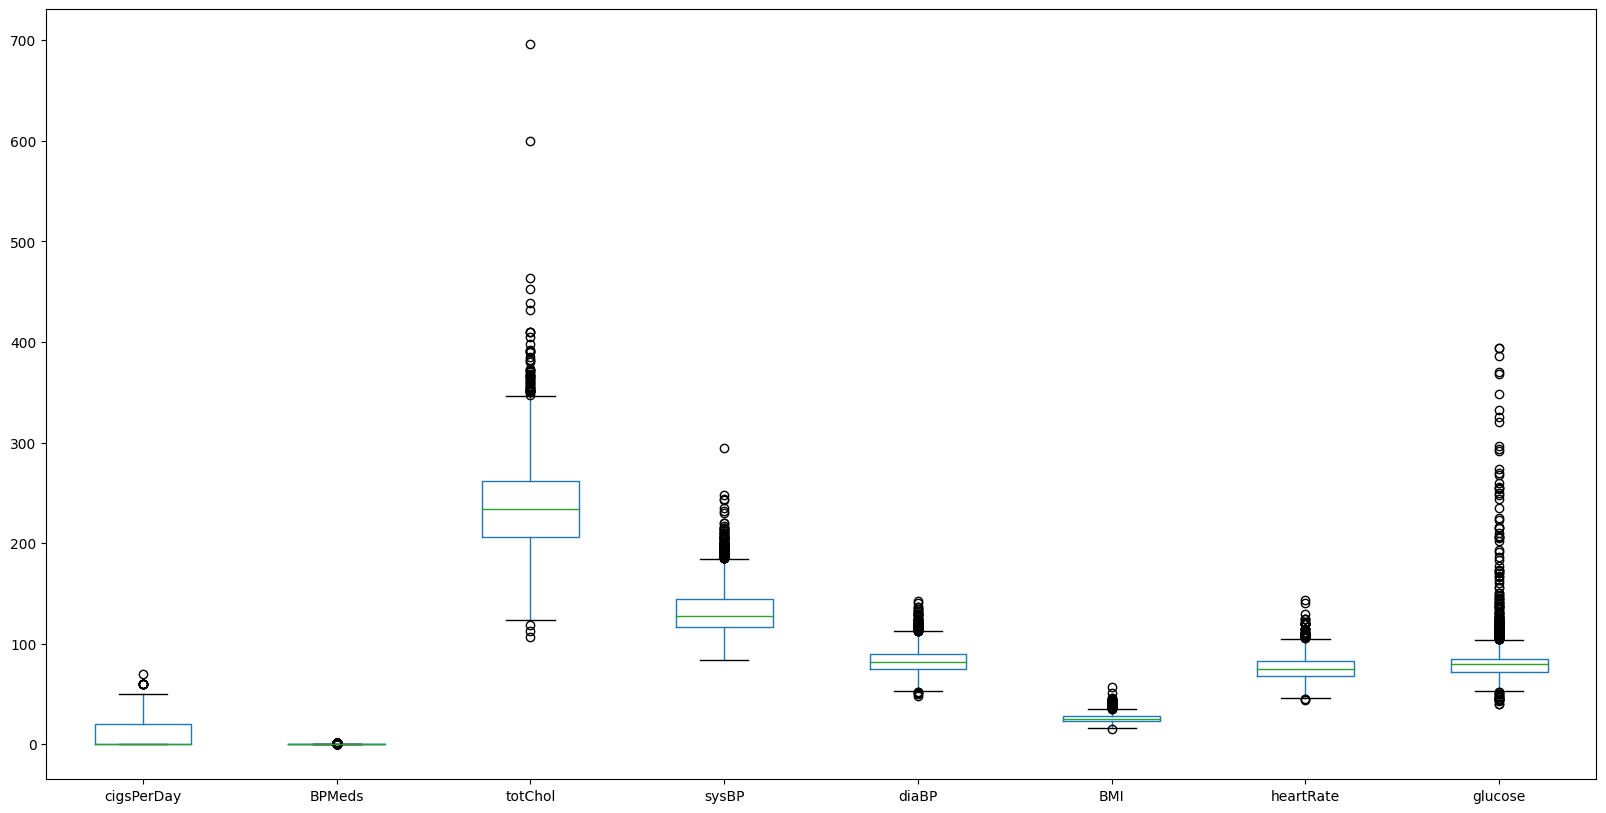

In [34]:
plt.figure(figsize=(20,10))
fr_cont.boxplot(grid=False)
plt.show()

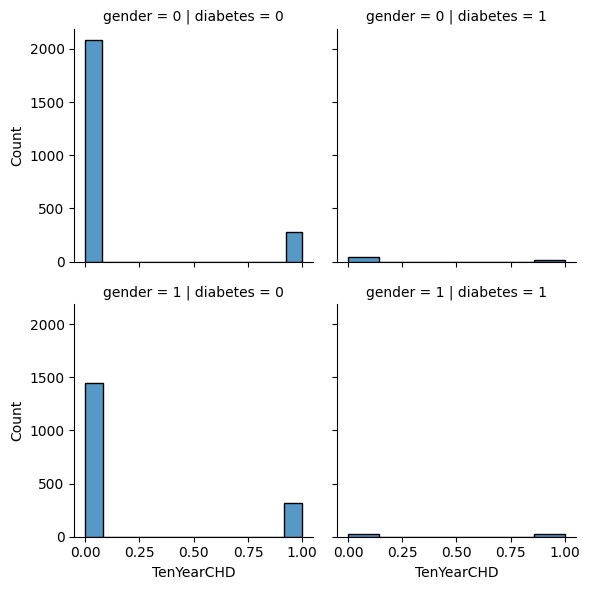

In [ ]:
g = sns.FacetGrid(data_fr, row='gender', col='diabetes')
g.map(sns.histplot, 'TenYearCHD')
plt.show()

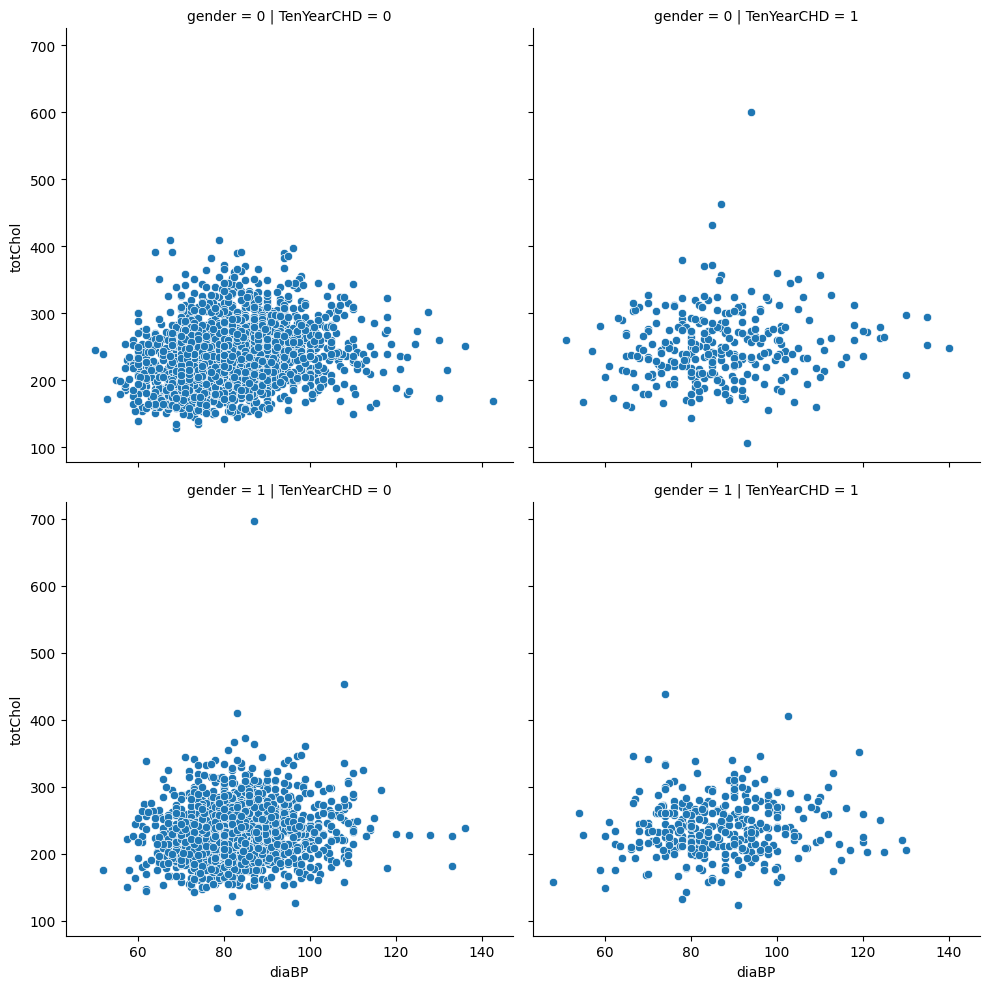

In [ ]:
g = sns.FacetGrid(data_fr, row='gender', col='TenYearCHD', height=5)
g.map(sns.scatterplot, 'diaBP','totChol')
plt.show()

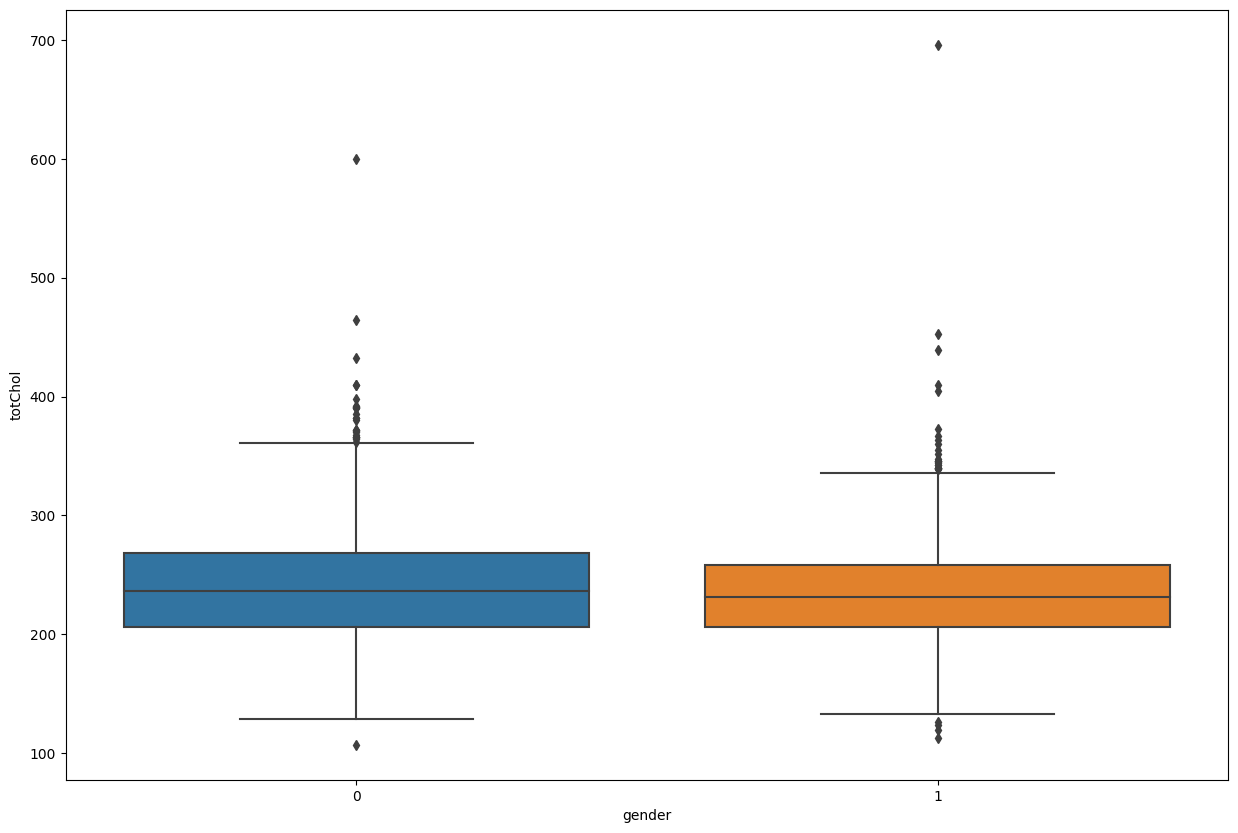

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_fr, x="gender", y='totChol', ax=ax)
plt.show()

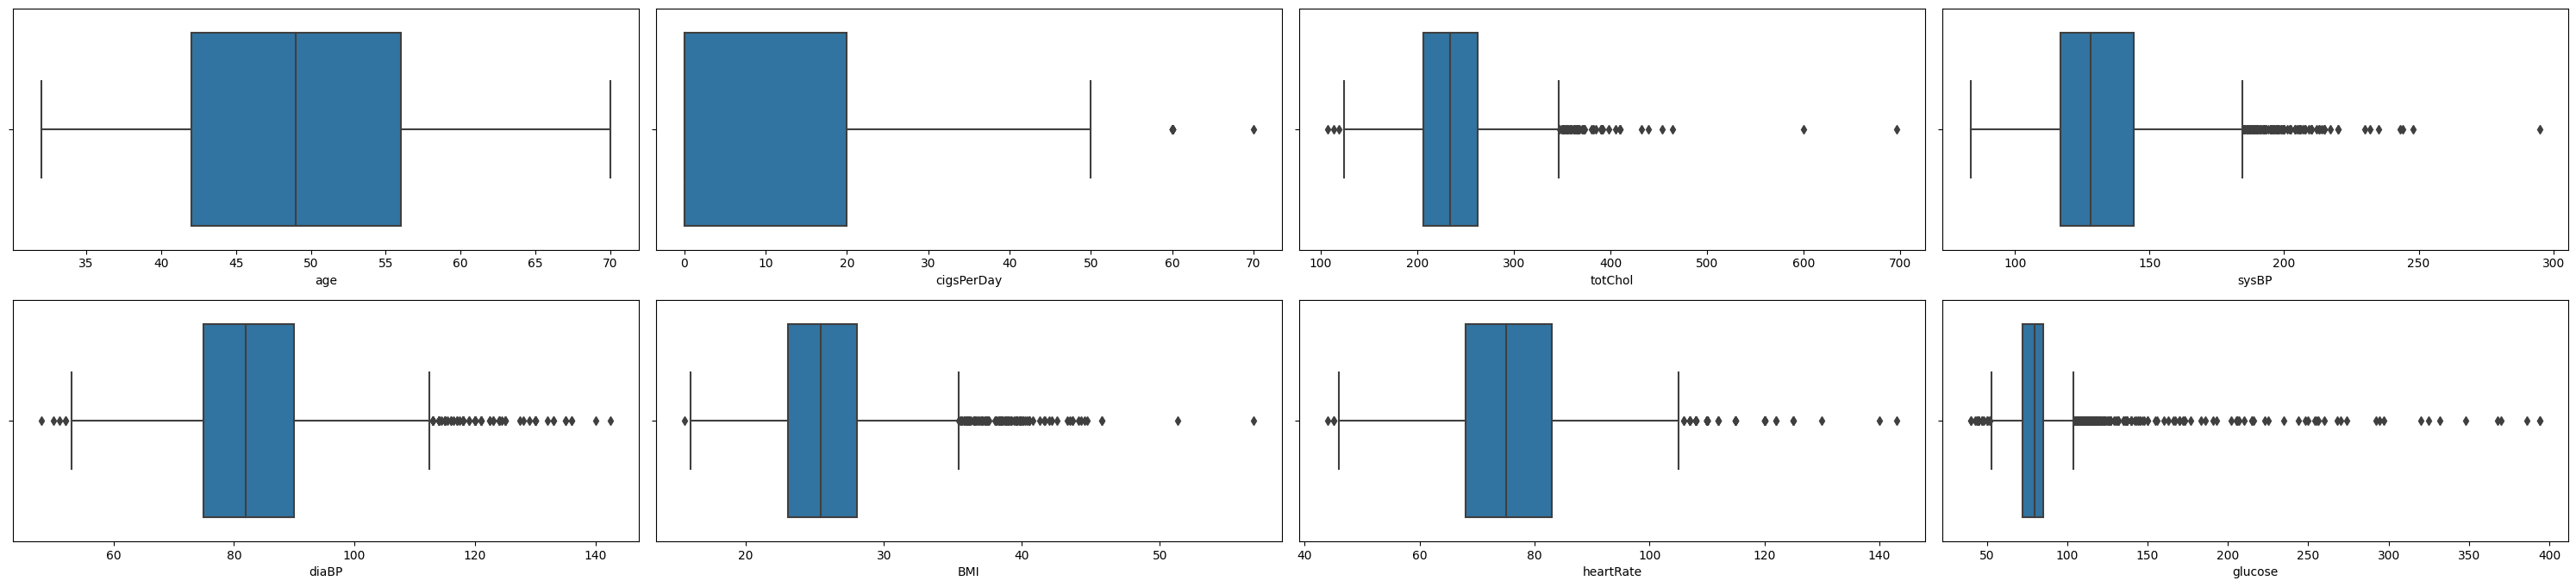

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(fr_cont.columns):
  plt.subplot(6, 4, i[0]+1)
  sns.boxplot(x=i[1], data = fr_cont)
plt.tight_layout()

<Axes: xlabel='gender'>

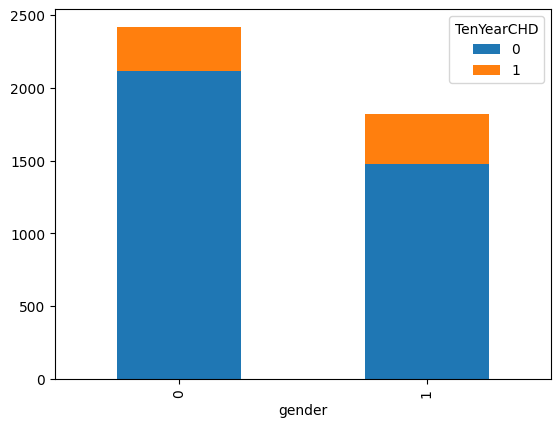

In [ ]:
%matplotlib inline

pd.crosstab(data_fr['gender'],data_fr['TenYearCHD']).plot.bar(stacked=True)

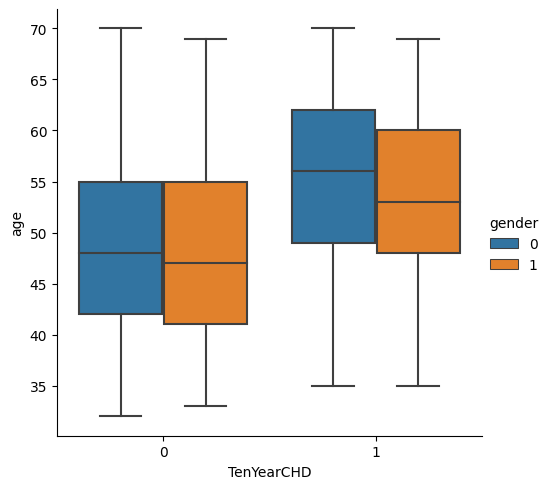

In [ ]:
sns.catplot(x='TenYearCHD',y='age',hue='gender',kind='box',data=data_fr)

**Generate Machine Learning Model**

0.The imbalance in target variable

In [35]:
## distribution in target varible
data_fr['TenYearCHD'].value_counts(normalize=True)

0   0.848
1   0.152
Name: TenYearCHD, dtype: float64

<Axes: >

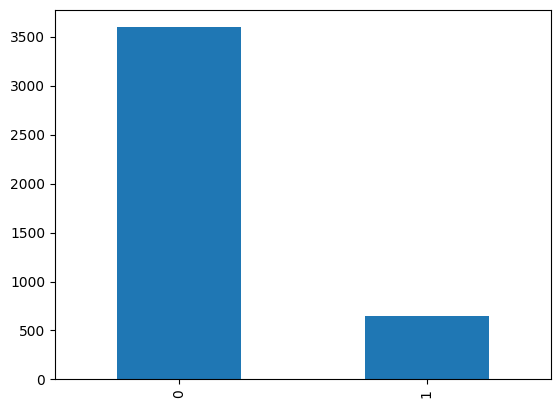

In [36]:
data_fr['TenYearCHD'].value_counts().plot(kind='bar')

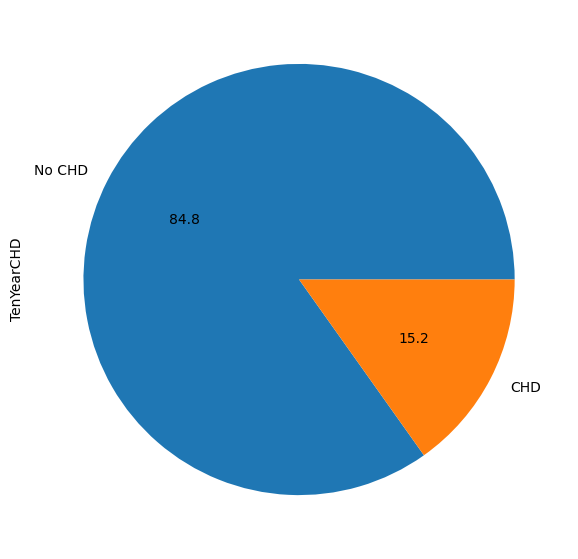

In [37]:
# visualizing distribution in pi-chart
plt.figure(figsize=(10,7))
data_fr['TenYearCHD'].value_counts().plot(kind='pie', autopct='%1.1f', labels=['No CHD', 'CHD'])
plt.show()

1. split (into X and Y)

In [38]:
fr_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239 entries, 0 to 4239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cigsPerDay  4239 non-null   float64
 1   BPMeds      4239 non-null   float64
 2   totChol     4239 non-null   float64
 3   sysBP       4239 non-null   float64
 4   diaBP       4239 non-null   float64
 5   BMI         4239 non-null   float64
 6   heartRate   4239 non-null   float64
 7   glucose     4239 non-null   float64
dtypes: float64(8)
memory usage: 298.1 KB


In [39]:
X = fr_cont
X.shape

(4239, 8)

In [40]:
Y = data_fr['TenYearCHD']
Y.shape

(4239,)

## Synthetic Minority Oversampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
# create test and train and SMOTE the X matrices
os = SMOTE(random_state=0)
X_os,Y_os = os.fit_resample(X, Y)

In [ ]:
X_os.shape, Y_os.shape

((7192, 8), (7192,))

In [ ]:
Y_os.value_counts(normalize=True)

0   0.500
1   0.500
Name: TenYearCHD, dtype: float64

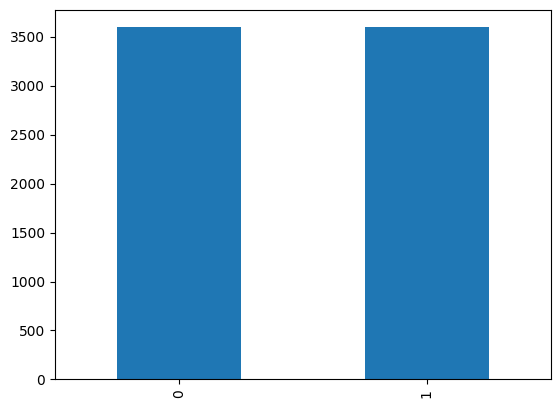

In [ ]:
Y_os.value_counts().plot(kind='bar')
plt.show()

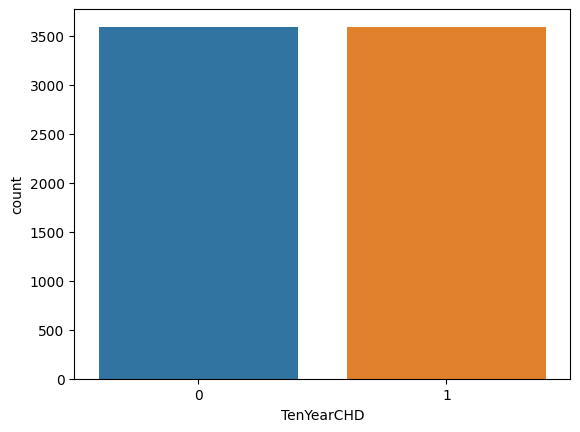

In [ ]:
sns.countplot(x=Y_os)
plt.show()

In [ ]:
df_os = pd.DataFrame(X_os)
df_os['TenYearCHD'] = Y_os

In [ ]:
df_os.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7192 entries, 0 to 7191
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         7192 non-null   int64  
 1   cigsPerDay  7192 non-null   float64
 2   totChol     7192 non-null   float64
 3   sysBP       7192 non-null   float64
 4   diaBP       7192 non-null   float64
 5   BMI         7192 non-null   float64
 6   heartRate   7192 non-null   float64
 7   glucose     7192 non-null   float64
 8   TenYearCHD  7192 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 505.8 KB


In [41]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_os, x='heartRate', y='age', hue='TenYearCHD')
plt.show()

NameError: ignored

<Figure size 1000x700 with 0 Axes>

# Train & Test

In [42]:
import sklearn as sk

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

# scaling the values

In [45]:
from sklearn.preprocessing import StandardScaler


In [46]:
fr_cont.describe()

,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4239.000,4239.000,4239.000,4239.000,4239.000,4239.000,4239.000,4239.000
mean,9.004,0.030,236.704,132.345,82.900,25.800,75.879,81.962
std,11.882,0.169,44.332,22.027,11.911,4.071,12.025,22.834
min,0.000,0.000,107.000,83.500,48.000,15.540,44.000,40.000
25%,0.000,0.000,206.000,117.000,75.000,23.075,68.000,72.000
50%,0.000,0.000,234.000,128.000,82.000,25.410,75.000,80.000
75%,20.000,0.000,262.000,144.000,90.000,28.025,83.000,85.000
max,70.000,1.000,696.000,295.000,142.500,56.800,143.000,394.000


In [47]:
# scaling train features for optimal model performance
sc_train = StandardScaler().fit(X_train)
X_train_sc = sc_train.transform(X_train)

In [48]:
# snapshot of transformed data
np.set_printoptions(precision=3)
print(X_train_sc[0:5,:])

[[-0.754 -0.183 -0.39  -0.02   0.655  0.517 -0.073 -0.093]
 [-0.754  5.527  2.232  2.252  2.048  0.561  2.508  0.618]
 [-0.754 -0.183 -0.704 -1.    -1.148  0.042 -0.073 -0.67 ]
 [ 1.778 -0.183 -0.973 -1.445 -1.885  0.947 -1.322 -0.582]
 [ 0.934 -0.183  0.618 -0.265 -0.083 -0.454 -0.073 -0.182]]


# training the model

In [49]:
  from sklearn.linear_model import LogisticRegression
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.tree import DecisionTreeClassifier, export_graphviz
  from sklearn import metrics

In [50]:
# create an instance for the logistic Rgression Model
model_lr = LogisticRegression(solver='liblinear')

In [51]:
# use train data to train the model features
model_lr.fit(X_train_sc, Y_train)

LogisticRegression(solver='liblinear')

# testing the model

In [52]:
# scaling the test features for optimal model performance
sc_test = StandardScaler().fit(X_test)
X_test_sc = sc_test.transform(X_test)

In [53]:
## test the performance of the model on the test data
results = model_lr.score(X_test_sc, Y_test)
results*100

85.062893081761

In [54]:
## test the performance of the model on the test data
results = model_lr.score(X_train_sc, Y_train)
results*100

84.96798112571621